In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from helpers.facedetection import extractFaces

In [8]:
fle_s='./saved/Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]
Model1 = tf.keras.models.load_model(fle_s)
print(Model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

In [7]:
fle_e='./saved/Age_sex_detection_UTKFace23k.h5'
checkpointer = ModelCheckpoint(fle_e, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]
Model2 = tf.keras.models.load_model(fle_e)
print(Model2.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [181]:
def testown(img, scaleFactor=1.1, minNeighbours=5):
    
    # extract faces
    faces = extractFaces(img, scaleFactor=scaleFactor, minNeighbours=minNeighbours)
    
    for face in faces:
    
        img1 = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
        plt.imshow(img1)
        plt.show()
        plt.clf()
        
        img1= cv2.resize(img1,(48,48))
        img2= cv2.resize(img2,(48,48))
        
        img1=img1/255
        img2=img2/255
        
        pred1=Model1.predict(np.array([img2]))
        pred2=Model2.predict(np.array([img1]))
        
        sex_f=['Male','Female']
        Exp=['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
        
        age=int(np.round(pred2[1][0]))
        sex=int(np.round(pred2[0][0]))
        
        print("Predicted Age: "+ str(age))
        print("Predicted Sex: "+ sex_f[sex])
        pred_class1=Exp[int(np.argmax(pred1))]
        print("Predicted Emotion: "+ pred_class1)
        
        

    # Without face detection
    img = cv2.imread(img)
    
    
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
    
    plt.imshow(img1)
    plt.show()
    plt.clf()

    img1= cv2.resize(img1,(48,48))
    img2= cv2.resize(img2,(48,48))

    img1=img1/255
    img2=img2/255

    pred1=Model1.predict(np.array([img2]))
    pred2=Model2.predict(np.array([img1]))

    sex_f=['Male','Female']
    Exp=['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

    age=int(np.round(pred2[1][0]))
    sex=int(np.round(pred2[0][0]))

    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ sex_f[sex])
    pred_class1=Exp[int(np.argmax(pred1))]
    print("Predicted Emotion: "+ pred_class1)
    

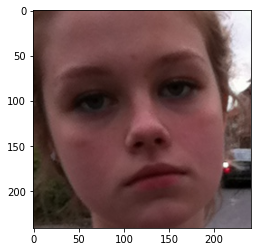

Predicted Age: 12
Predicted Sex: Female
Predicted Emotion: sadness


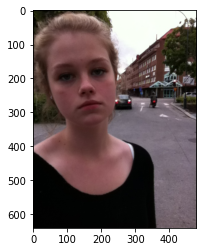

Predicted Age: 39
Predicted Sex: Female
Predicted Emotion: sadness


<Figure size 432x288 with 0 Axes>

In [190]:
img = './images/elsa15.jfif'
testown(img, scaleFactor=1.2, minNeighbours=5)

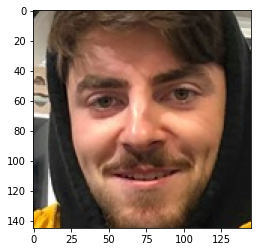

Predicted Age: 34
Predicted Sex: Female
Predicted Emotion: happy


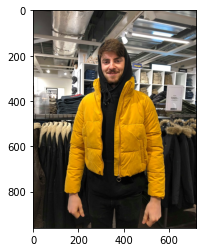

Predicted Age: 31
Predicted Sex: Male
Predicted Emotion: surprise


<Figure size 432x288 with 0 Axes>

In [192]:
img = './images/lukas.jpg'
testown(img, scaleFactor=1.2, minNeighbours=5)